In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

import seaborn as sns

In [2]:
qst = pd.read_excel('Questionnair2.xlsx')
qst.head()

,Age group,Gender,Time in Internet,General understanding of e-Health,Have you used e-Health services?,How much do you trust e-Health services,I find e-Health useful for consulting a doctor,Using e-Health encourages me to have faster communication with my doctor,"If I use e-Health, it makes it easier for me to communicate with my doctor",How easy is it to use the service,...,Assess the sufficiency of the infrastructure for using the service,I have all the resources needed to use e-Health,I have the knowledge required to use e-Health,I think e-Health fits my lifestyle,How likely are you to seek online advice?,Competences and skills of medical professionals,Ease of use,Quality of services,Protection of personal data,Promotion
0,56 - 65,Male,More than 3 hours,More positive but cautious attitude towards on...,Yes,7.0,2.0,2.0,3.0,9.0,...,10.0,4.0,4.0,2.0,I assume that I will use e-Health in the next ...,NaN,NaN,NaN,NaN,NaN
1,56 - 65,Male,Less than 1 hour,More positive but cautious attitude towards on...,Yes,11.0,3.0,4.0,4.0,12.0,...,12.0,4.0,4.0,4.0,I am going to use e-Health in the next 6 months,NaN,NaN,NaN,NaN,NaN
2,56 - 65,Female,More than 3 hours,More positive but cautious attitude towards on...,Yes,12.0,4.0,4.0,4.0,15.0,...,15.0,5.0,5.0,5.0,I assume that I will use e-Health in the next ...,NaN,NaN,NaN,NaN,NaN
3,29 - 45,Male,More than 3 hours,More positive but cautious attitude towards on...,Yes,12.0,4.0,4.0,4.0,12.0,...,15.0,5.0,5.0,5.0,I assume that I will use e-Health in the next ...,NaN,NaN,NaN,NaN,NaN
4,29 - 45,Female,1-3 hours,"Positive, it's quite acceptable, and I trust t...",Yes,15.0,5.0,5.0,5.0,15.0,...,15.0,5.0,5.0,5.0,I plan to use e-Health in the next 6 months,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Age group")
print(qst['Age group'].value_counts())

print("\n\nGender")
print(qst['Gender'].value_counts())

print("\n\nTime in Internet")
print(qst['Time in Internet'].value_counts())

print("\n\nGeneral understanding of e-Health")
print(qst['General understanding of e-Health'].value_counts())

print("\n\nHave you used e-Health services?")
print(qst['Have you used e-Health services?'].value_counts())

Age group
18 - 21        120
22 - 28         32
29 - 45         24
56 - 65         17
46 - 55         13
66 і більше      1
Name: Age group, dtype: int64


Gender
Female    119
Male       85
Other       3
Name: Gender, dtype: int64


Time in Internet
More than 3 hours    116
1-3 hours             65
Less than 1 hour      26
Name: Time in Internet, dtype: int64


General understanding of e-Health
I don't know that there is such a thing                                  62
More positive but cautious attitude towards online advice                61
Positive, it's quite acceptable, and I trust this advice                 32
I want to receive such consultations, but I do not know how it works     27
Neutral because I do not trust anyone except my doctor                   22
Rather negative, because the Internet is about everything and nothing     2
Негативно – невідомо хто за цим стоїть                                    1
Name: General understanding of e-Health, dtype: int64


Have you used

## People who have used e-Health services

In [4]:
qst_yes = qst[qst['Have you used e-Health services?']=='Yes']
qst_yes = qst_yes.dropna(axis=1)

In [5]:
qst_yes.describe(include='object').T

,count,unique,top,freq
Age group,63,5,18 - 21,25
Gender,63,3,Female,40
Time in Internet,63,3,More than 3 hours,41
General understanding of e-Health,63,6,More positive but cautious attitude towards on...,26
Have you used e-Health services?,63,1,Yes,63
How likely are you to seek online advice?,63,3,I assume that I will use e-Health in the next ...,43


In [6]:
qst_yes.describe().T

,count,mean,std,min,25%,50%,75%,max
How much do you trust e-Health services,63.0,12.031746,2.264511,7.0,10.5,12.0,14.0,15.0
I find e-Health useful for consulting a doctor,63.0,4.111111,0.742948,2.0,4.0,4.0,5.0,5.0
Using e-Health encourages me to have faster communication with my doctor,63.0,3.952381,0.887704,2.0,3.5,4.0,5.0,5.0
"If I use e-Health, it makes it easier for me to communicate with my doctor",63.0,3.968254,0.983218,1.0,3.0,4.0,5.0,5.0
How easy is it to use the service,63.0,11.841270,2.201219,6.0,10.0,12.0,13.0,15.0
My interaction with e-Health is clear and understandable,63.0,3.920635,0.809253,2.0,3.0,4.0,4.5,5.0
I think e-Health is easy to use,63.0,3.920635,0.848178,2.0,3.0,4.0,4.5,5.0
It was easy to learn how to use e-Health,63.0,4.000000,0.762001,2.0,4.0,4.0,4.5,5.0
To what extent was my opinion of the service influenced by my surroundings,63.0,8.698413,2.637416,3.0,7.0,9.0,10.0,15.0
People who influence my behaviour think I should use e-Health,63.0,2.539683,1.075015,1.0,2.0,3.0,3.0,5.0


In [7]:
qst_yes_regr = qst_yes[['How much do you trust e-Health services', 
                       'How easy is it to use the service', 
                       'To what extent was my opinion of the service influenced by my surroundings', 
                       'Assess the sufficiency of the infrastructure for using the service']]

<AxesSubplot:>

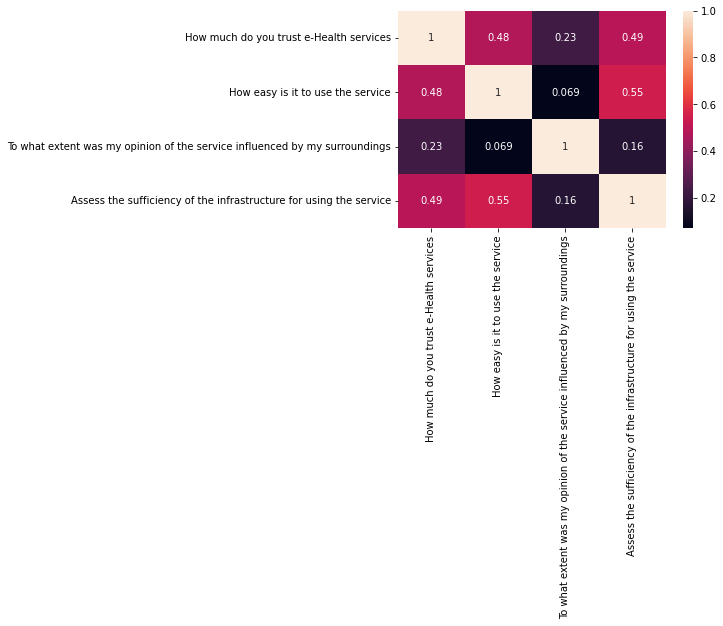

In [8]:
corr = qst_yes_regr.corr()
sns.heatmap(corr, annot = True)

In [9]:
regr = linear_model.LinearRegression()
regr.fit(qst_yes_regr[['How easy is it to use the service',
                 'Assess the sufficiency of the infrastructure for using the service']], 
         qst_yes_regr['How much do you trust e-Health services'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: 3.680284442832802
lr.coef_: [0.30390696 0.36920776]


In [10]:
regr.fit(qst_yes_regr[['How much do you trust e-Health services', 
                  'Assess the sufficiency of the infrastructure for using the service']], 
         qst_yes_regr['How easy is it to use the service'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: 2.8680797135919747
lr.coef_: [0.26520353 0.44918212]


In [11]:
regr.fit(qst_yes_regr[['How much do you trust e-Health services', 
                  'How easy is it to use the service']], 
         qst_yes_regr['Assess the sufficiency of the infrastructure for using the service'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: 5.2239748577046985
lr.coef_: [0.26800764 0.37364584]


## Data Reliability

In [12]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [13]:
print(cronbach_alpha(qst_yes_regr))

0.6623516043812034
